<a href="https://colab.research.google.com/github/christabs27/Converting_and_uploading/blob/main/11_8_3_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.8.3 Activity

In this activity, we’ll examine trends in monthly shampoo sales at a convenience store from 1981 to 1983.  We’ll model the relationship using an ARIMA model and make predictions.

#Step 1: Download and save the `shampoo.csv` dataset from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `shampoo.csv` dataset by running the following code block 

* When prompted, navigate to and select the `shampoo.csv` dataset where you saved it on your computer.

In [1]:
#Step 2

from google.colab import files
shampoo = files.upload()

Saving shampoo.csv to shampoo.csv


#Step 3: Import necessary packages
* This step may take a little while.  Make sure to type "y" if prompted.

```
!pip uninstall statsmodels

!pip install statsmodels

import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
```


In [2]:
#Step 3
!pip uninstall statsmodels

!pip install statsmodels

import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt





Found existing installation: statsmodels 0.12.2
Uninstalling statsmodels-0.12.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.12.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.2 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


# Step 4: Create a Pandas DataFrame from the CSV file
* Run the following code block to put the dates in the proper format and create a Pandas DataFrame called `shampoo`.
* Note the type of data it contains.

In [3]:
#Step 4
from pandas import datetime
def parser(x):
	return datetime.strptime('198'+x, '%Y-%m')
 
shampoo = pd.read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
shampoo.index = shampoo.index.to_period('M')
shampoo.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1981-01    266.0
1981-02    145.9
1981-03    183.1
1981-04    119.3
1981-05    180.3
1981-06    168.5
1981-07    231.8
1981-08    224.5
1981-09    192.8
1981-10    122.9
Freq: M, Name: Sales, dtype: float64

# Step 5: Graph the shampoo dataset
* Run the following code block to graph the shampoo dataset.  Does the data appear stationary?

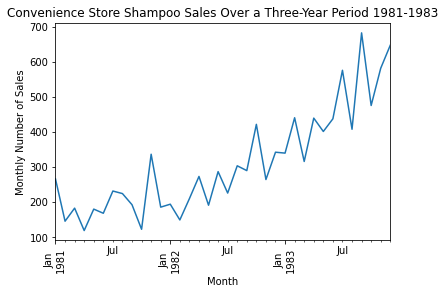

In [4]:
#Step 5

shampoo.plot()
plt.ylabel('Monthly Number of Sales')
plt.title('Convenience Store Shampoo Sales Over a Three-Year Period 1981-1983')
plt.xticks(rotation=90)
plt.show()

**Step 5 Answer:**



#Step 6: Split the data into training and test sets  
* Because the dataset is so small (only 36 observations), we will only split the data into training and test sets rather than include a validation set as well. 
* We want to see if we can predict a seven-day forecast, so we should reserve the last seven days of the data as our test set.
* The test data are located in the last seven observations of the dataset.  The rest of the data is selected to be the the training set.  
* Examine the lengths of `train`, `test` and `shampoo` to make sure that you aren't missing any observations.





In [5]:

# Step 6

X = shampoo.values

test = X[len(X)-7:]

train = X[:len(X)-7]

print(len(shampoo))
print(len(train))
print(len(test))



36
29
7


#Step 7: Difference the training data and check for stationarity
* Run the following code block to difference the shampoo sales data and plot the differences.
* Does the data now appear stationary?

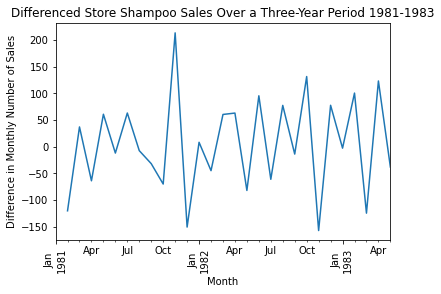

In [6]:
#Step 7


train_diffs = pd.DataFrame(shampoo[:len(shampoo)-7])

train_diffs['sales_differences'] = train_diffs['Sales'].diff()

train_diffs['sales_differences'].plot()
plt.ylabel('Difference in Monthly Number of Sales')
plt.title('Differenced Store Shampoo Sales Over a Three-Year Period 1981-1983')
plt.xticks(rotation=90)
plt.show()



 # Step 8: Plot the autocorrelation using the differenced values in the training set
 * Plot the autocorrelation for the training data using: 
 
 ```
autocorrelation_plot(train_diffs['sales_differences'])
plt.show()
```

* Is there any autocorrelation remaining after we difference the data?

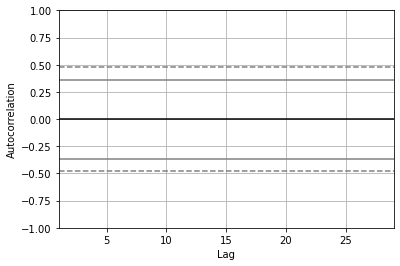

In [7]:
#Step 8

autocorrelation_plot(train_diffs['sales_differences'])
plt.show()

**Step 8 Answer:**



#Step 9: Check the model fit for an ARIMA(0,1,0) model
* Run the following code block to difference the shampoo sales data and plot the differences that has been differenced by 1 but does not have an AR or MA component.
* The code block will output the RMSE and a plot of the predicted vs. actual values in the test data.
* On average, how far off are the predicted sales compared to the actual values?

predicted=401.300000, expected=437.400000
predicted=437.400000, expected=575.500000
predicted=575.500000, expected=407.600000
predicted=407.600000, expected=682.000000
predicted=682.000000, expected=475.300000
predicted=475.300000, expected=581.300000
predicted=581.300000, expected=646.900000
Test RMSE: 161.300


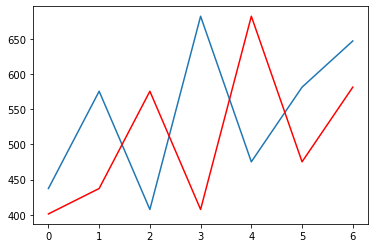

In [8]:
#Step 9

history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Step 9 Answer:**


#Step 10: Check the model fit for an ARIMA(0,1,1) model
* Run the following code block to difference the shampoo sales data and plot the differences that has been differenced by 1, has an MA window of 1, and doesn't have an AR component.
* The code block will output the RMSE and a plot of the predicted vs. actual values in the test data.
* On average, how far off are the predicted sales compared to the actual values?  How does this model compare to the model with no MA window?

predicted=387.646982, expected=437.400000
predicted=406.585342, expected=575.500000
predicted=478.293450, expected=407.600000
predicted=446.939479, expected=682.000000
predicted=544.265318, expected=475.300000
predicted=513.254334, expected=581.300000
predicted=540.462770, expected=646.900000
Test RMSE: 126.476


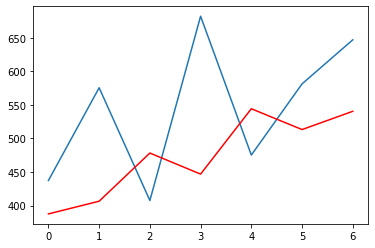

In [9]:
#Step 10
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Step 10 Answer:**



#Step 11: Check the model fit for an ARIMA(0,1,2) model
* Run the following code block to difference the shampoo sales data and plot the differences that has been differenced by 1, has an MA window of 2, and doesn't have an AR component.
* The code block will output the RMSE and a plot of the predicted vs actual values in the test data.
* On average, how far off are the predicted sales compared to the actual values?  How does this model compare to the previous models?

predicted=397.510794, expected=437.400000
predicted=428.964793, expected=575.500000
predicted=423.859523, expected=407.600000
predicted=552.826904, expected=682.000000
predicted=509.402831, expected=475.300000
predicted=630.518905, expected=581.300000
predicted=609.793298, expected=646.900000
Test RMSE: 80.157


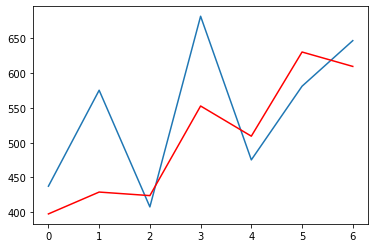

In [10]:
#Step 11
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Step 11 Answer:**



#Step 12: Check the model fit for an ARIMA(0,1,3) model
* Run the following code block to difference the shampoo sales data and plot the differences that has been differenced by 1, has an MA window of 3, and doesn't have an AR component.
* The code block will output the RMSE and a plot of the predicted vs. actual values in the test data.
* On average, how far off are the predicted sales compared to the actual values? How does this model compare to the previous models we've built?

predicted=410.514248, expected=437.400000
predicted=433.012701, expected=575.500000
predicted=436.885890, expected=407.600000
predicted=532.701186, expected=682.000000
predicted=524.653447, expected=475.300000
predicted=628.520348, expected=581.300000
predicted=607.418932, expected=646.900000
Test RMSE: 84.851


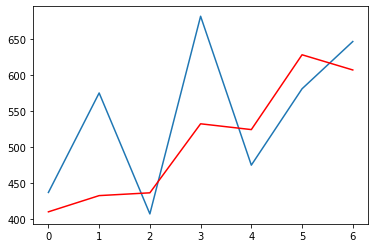

In [11]:
#Step 12
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Step 12 Answer:**

